## iris dataset from sklearn

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [0]:
iris_dataset = datasets.load_iris()
# iris_dataset

## get data and label(target) from iris dataset

In [0]:
iris_data = iris_dataset.data
iris_target = iris_dataset.target

#Clustering

##KMeans

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_data)
# kmeans.score(X_test, y_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#평가

In [53]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Sum of Squared Error(SSE)

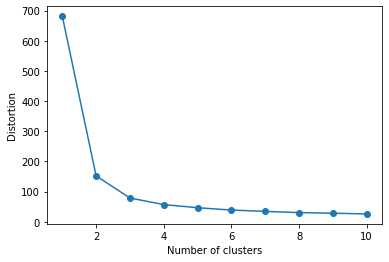

In [54]:
import matplotlib.pyplot as plt
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans.fit(iris_data)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

##silhouette

In [0]:
kmeans = KMeans(n_clusters=4, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
# kmeans.fit(iris_data)
y_pred = kmeans.fit_predict(iris_data)

from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
silhouette_score(iris_data, labels=kmeans.labels_)

silhouette_vals = silhouette_samples(iris_data, y_pred)
silhouette_avg = np.mean(silhouette_vals)
silhouette_vals, silhouette_avg

In [57]:
kmeans.cluster_centers_, kmeans.labels_, kmeans.inertia_

(array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
        [6.2525    , 2.855     , 4.815     , 1.625     ],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.53214286, 2.63571429, 3.96071429, 1.22857143]]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
        3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
        3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int32),
 57.228473214285714)